## Initialization

In [18]:
from datasets import datasets_utils_test
from torch.utils.data import Dataset, DataLoader
import utils

import torch
from torch import nn

import argparse
import os
import numpy as np

In [19]:
seed = 31
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)

In [20]:
import matplotlib.pyplot as plt

def plot_one_slice(img, cmap = 'gray'):
    plt.imshow(img, cmap=cmap)
    plt.show()

## Loading the data

In [96]:
args = argparse.Namespace(drop_perc=0.35, drop_type='zeros', drop_align=(7, 16, 16), volume_size=(21, 64, 64))
transform = datasets_utils_test.DataAugmentationSiT(args)

In [97]:
class NumpyArrayDataset(Dataset):
    def __init__(self, directory, transform=None):
        self.directory = directory
        self.file_list = os.listdir(directory)
        self.transform = transform

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        # Load and preprocess the data at the given index
        #data = self.file_list[index]
        file_name = self.file_list[idx]
        file_path = os.path.join(self.directory, file_name)
        
        array = np.load(file_path)
        array_file0 = array.files[0]
        data = array[array_file0].astype(float)
        # Squeeze the arrays to remove the redundant dimension
        data = data.squeeze()
        # Perform any necessary transformations or preprocessing on the data
        
        if self.transform is not None:
            clean_crops, corrupted_crops, masks_crops = self.transform(data)
        return clean_crops, corrupted_crops, masks_crops

In [100]:
dataset = NumpyArrayDataset(directory="../npz/original/", transform=transform)
dataloader = DataLoader(dataset, batch_size=6, shuffle=True)

In [101]:
dataset[0][0][0].shape

torch.Size([1, 21, 64, 64])

In [81]:
for batch in dataloader:
    clean_crops, corrupted_crops, masks_crops = batch
    print(clean_crops[0].shape)
    #print(corrupted_crops.shape)
    #print(masks_crops.shape)
    break

torch.Size([6, 1, 21, 64, 64])


In [82]:
print(corrupted_crops[0][0][0, 0, :, :].size())

torch.Size([64, 64])


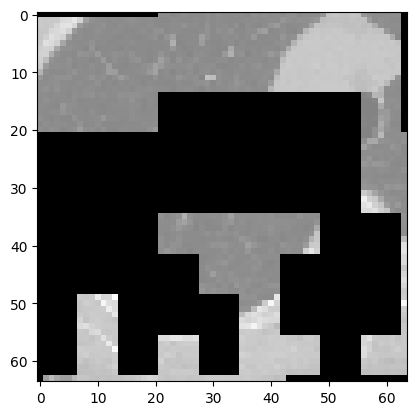

In [83]:
plot_one_slice(corrupted_crops[0][0][0, 0, :, :])

In [94]:
type(clean_crops[0][0][0, 0, :, :])

torch.Tensor

In [100]:
def mirror_gray_values(tensor):
    min_value = torch.min(tensor)
    max_value = torch.max(tensor)

    mirrored_tensor = 1 - tensor + 0

    return mirrored_tensor

In [115]:
import random

class GrayValueMirror:
    def __init__(self, probability):
        self.probability = probability

    def __call__(self, tensor):
        if random.random() < self.probability:
            min_value = torch.min(tensor)
            max_value = torch.max(tensor)
            mirrored_tensor = max_value - tensor + min_value
            return mirrored_tensor
        else:
            return tensor

In [116]:
mirror_tensor = mirror_gray_values(clean_crops[0][0][0, 0, :, :])

tensor(0.)
tensor(0.8963)


In [117]:
gray_value_mirror = GrayValueMirror(probability=0.5)


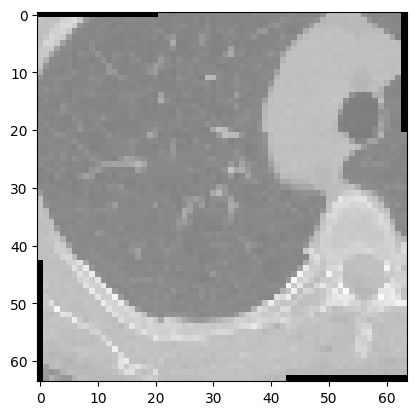

In [126]:
plot_one_slice(gray_value_mirror(clean_crops[0][0][0, 0, :, :]))

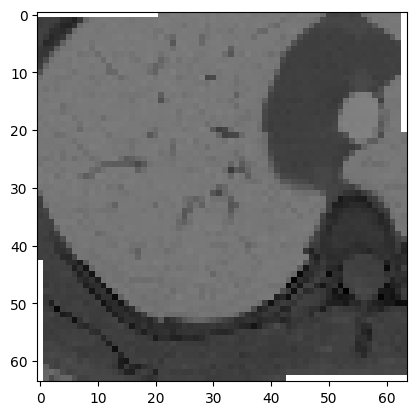

In [108]:
plot_one_slice(mirror_tensor)

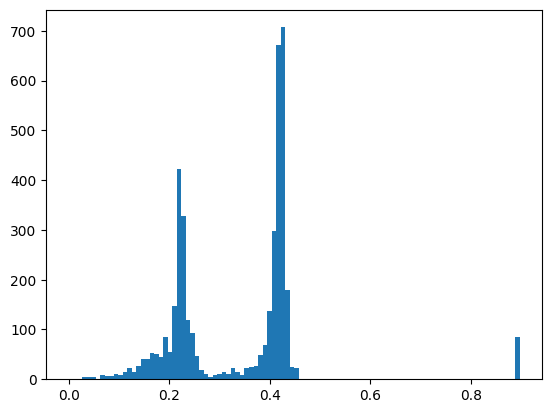

In [109]:
plt.hist(mirror_tensor.flatten(), bins=100)
plt.show()

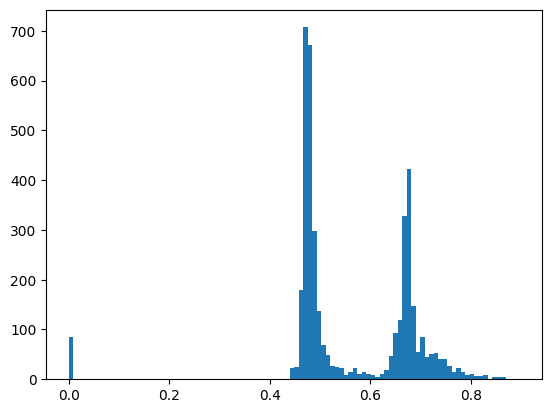

In [110]:
plt.hist(clean_crops[0][0][0, 0, :, :].flatten(), bins=100)
plt.show()

---

In [7]:
def plot_3D(img_arr):
    
    data = img_arr.transpose(2,1,0)

    # Create a figure and axes
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Get the dimensions of the data array
    x, y, z = data.shape

    # Create a meshgrid for the x, y, and z coordinates
    X, Y, Z = np.meshgrid(range(x), range(y), range(z))

    # Flatten the coordinates and data values
    X = X.flatten()
    Y = Y.flatten()
    Z = Z.flatten()
    values = data.flatten()

    # Plot the 3D data as a scatter plot
    ax.scatter(X, Y, Z, c=values, cmap='gray')

    # Set labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('CT Scan')
    ax.set_axis_off()

    ax.view_init(elev=90, azim=-20)
    
    # Show the plot
    plt.show()

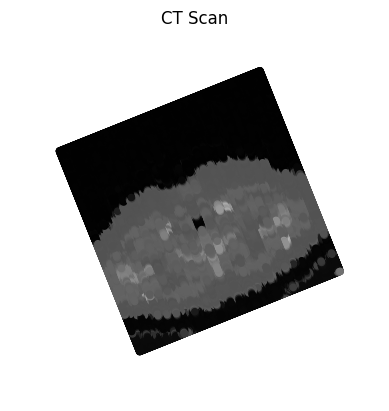

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some example 3D data
img_array = data_list[0]
#img_array = img_array[10:-10, 10:-10, 10:-10]
plot_3D(img_array)

In [23]:
random_patch = random_volume_patch(data_list[0])

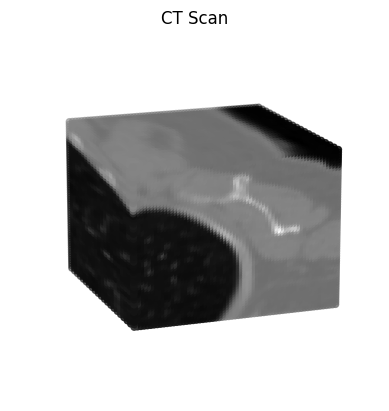

In [25]:
plot_3D(random_patch)

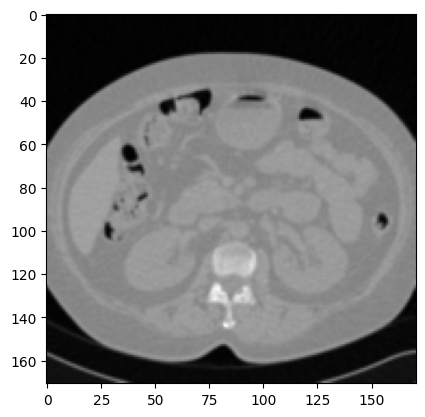

In [26]:
plot_one_slice(data_list[0][0])

In [43]:
X, Y, Z = np.meshgrid(range(x), range(y), range(z))
X.ravel().shape

(2690800,)

In [7]:
len(data_list)

60

In [8]:
args = argparse.Namespace(drop_perc=0.35, drop_type='noise', drop_align=(7, 16, 16))

transform = datasets_utils_test.DataAugmentationSiT(args)

dataset = MyDataset(data_list, transform=transform)
data_loader = DataLoader(dataset, batch_size=2, shuffle=True)

In [9]:
data_loader_iter = iter(data_loader)
clean_crops, corrupted_crops, masks_crops = next(data_loader_iter)

In [10]:
len(corrupted_crops)

2

In [11]:
clean_crops[0].shape

torch.Size([2, 1, 21, 64, 64])

In [12]:
clean_crops[0].dtype

torch.float32

## Test transformations in DataAugmentation

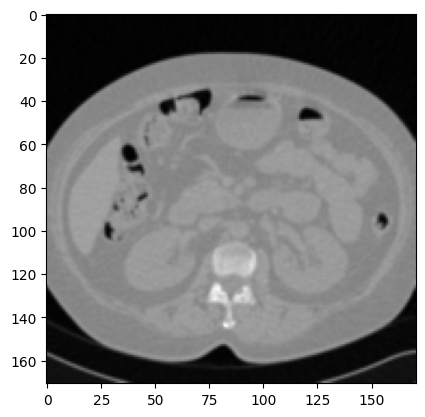

In [12]:
plot_one_slice(data_list[0][0])

In [9]:
clean_crops, corrupted_crops, masks_crops = transform(data_list[0])

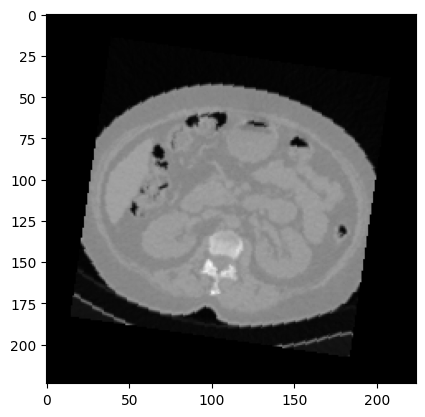

In [10]:
plot_one_slice(clean_crops[0][0][0])

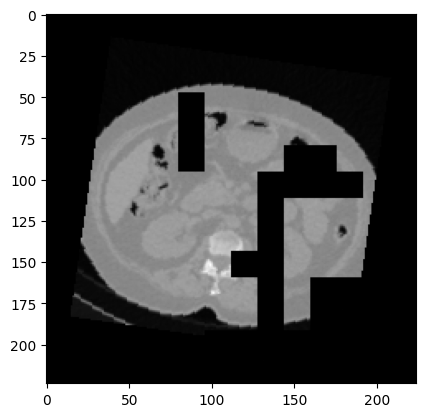

In [11]:
plot_one_slice(corrupted_crops[0][0][0])

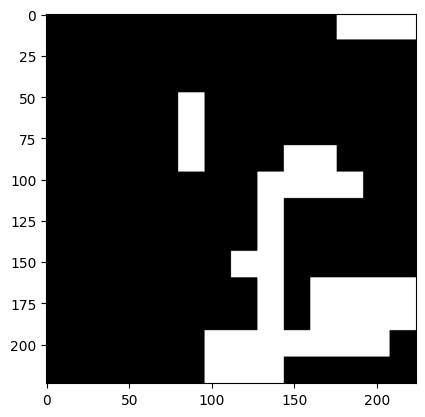

In [12]:
plot_one_slice(masks_crops[0][0][0])

----

## Random 3D Patch

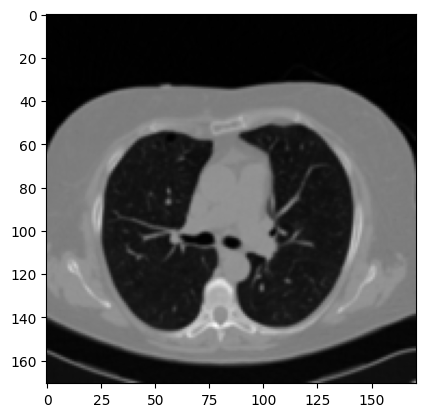

In [19]:
plot_one_slice(data_list[0][100])

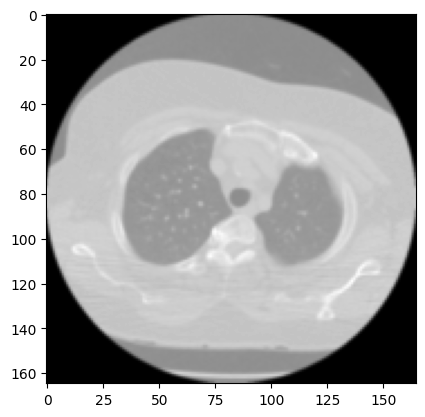

In [9]:
plot_one_slice(data_list[0][100])

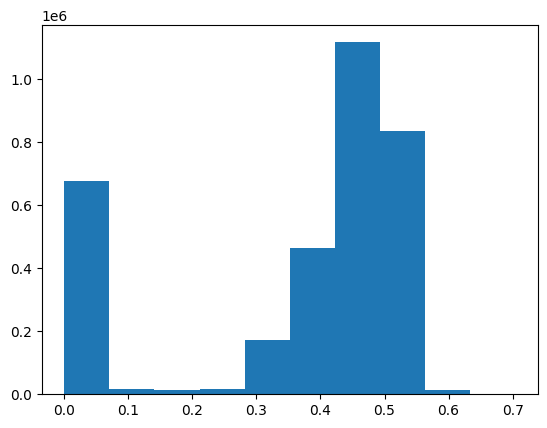

In [11]:
plt.hist(data_list[0].flatten())
plt.show()

In [10]:
import numpy as np

sample_arr = data_list[0][0]
min_val = np.min(sample_arr)
max_val = np.max(sample_arr)

scaled_arr = 255 * (sample_arr - min_val) / (max_val - min_val)

pixels = scaled_arr.flatten()

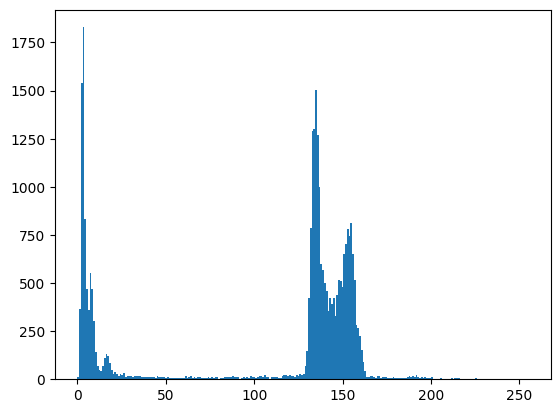

In [11]:
plt.hist(pixels, bins=256)
plt.show()

In [20]:
def random_volume_patch(tensor, threshold=0.1, volume_shape=(21, 64, 64), required_percentage=0.7):
    tensor_shape = tensor.shape

    if len(tensor_shape) != 3:
        raise ValueError("The input tensor must be a 3D tensor.")

    if any(dim < size for dim, size in zip(tensor_shape, volume_shape)):
        raise ValueError("The volume size cannot be larger than the tensor dimensions.")

    while True:
        # Generate random indices for the volume
        start_indices = [np.random.randint(dim - size + 1) for dim, size in zip(tensor_shape, volume_shape)]
        end_indices = [start + size for start, size in zip(start_indices, volume_shape)]

        # Extract the random volume from the tensor
        volume = tensor[start_indices[0]:end_indices[0], start_indices[1]:end_indices[1], start_indices[2]:end_indices[2]]

        # Calculate the percentage of values above the threshold
        above_threshold = np.sum(volume > threshold)
        percentage_above_threshold = above_threshold / volume.size

        if percentage_above_threshold >= required_percentage:
            return volume

In [17]:
#np.savez_compressed('compressed_array.npz', data_list[0])

In [18]:
random_patch = random_volume_patch(data_list[0])

In [19]:
random_patch.shape

(21, 64, 64)

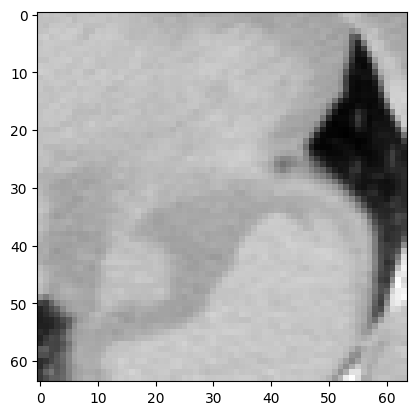

In [20]:
plot_one_slice(random_patch[0])

## Other Test!

In [16]:
import vision_transformer_3d_test as vits
from vision_transformer_3d_test import CLSHead, RECHead_3D

class FullPipline(nn.Module):
    def __init__(self, backbone, head, head_recons):
        super(FullPipline, self).__init__()

        
        backbone.fc, backbone.head = nn.Identity(), nn.Identity()
        self.backbone = backbone
        self.head = head
        self.head_recons = head_recons

    def forward(self, x, recons=True):
        _out = self.backbone(x)
        
        if recons==True:
            return self.head(_out[:, 0]), self.head_recons(_out[:, 1:])
        else:
            return self.head(_out[:, 0]), None

student = vits.__dict__['vit_tiny']()
teacher = vits.__dict__['vit_tiny']()
embed_dim = student.embed_dim 

student = FullPipline(student, CLSHead(embed_dim, embed_dim), RECHead_3D(embed_dim))
teacher = FullPipline(teacher, CLSHead(embed_dim, embed_dim), RECHead_3D(embed_dim))

In [23]:
torch.cat(clean_crops[0:]).shape

torch.Size([4, 1, 147, 224, 224])

In [24]:
t_cls, _ = teacher(torch.cat(clean_crops[0:]), recons=False)
#s_cls, s_recons = student(torch.cat(corrupted_crops[0:]))

torch.Size([4, 4117, 192])


In [25]:
t_cls.shape

torch.Size([4, 192])

In [ ]:
cls_token = nn.Parameter(torch.zeros(1, 1, 192))

In [ ]:
cls_token.shape

torch.Size([1, 1, 192])

In [ ]:
cls_tokens = cls_token.expand(5, -1, -1)
cls_tokens.shape

torch.Size([5, 1, 192])

In [ ]:
x = torch.randn(5, 4116, 192)
x.shape

torch.Size([5, 4116, 192])

In [ ]:
torch.cat((cls_tokens, x), dim=1).shape

torch.Size([5, 4117, 192])

---

In [48]:
array_mri = np.load("../cohort_MRI/cohort_npz_new/1.3.6.1.4.1.14519.5.2.1.100015594689512253703687513220581252948.npz")
data_mri = array_mri[array_mri.files[0]].astype(float)

In [49]:
data_mri.shape

(165, 180, 180)

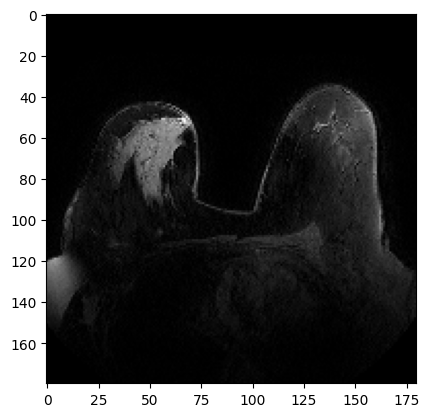

In [53]:
plot_one_slice(data_mri[100])

In [35]:
import numpy as np
import os

# Directory containing the .npz files
directory = "../cohort_MRI/cohort_npz_new/"

# List all .npz files in the directory
npz_files = [file for file in os.listdir(directory) if file.endswith(".npz")]

#all_data = [] # List to store the arrays
num_slices = []
shapes = []
# Loop through each .npz file and read the array
for npz_file in npz_files:
    npz_path = os.path.join(directory, npz_file)
    
    # Load the .npz file
    array_mri = np.load(npz_path)
    
    # Assuming each .npz file contains a single array
    array_name = array_mri.files[0]
    data_mri = array_mri[array_name].astype(float)
    
    # Append to the list of arrays
    #all_data.append(data_mri)
    num_slices.append(data_mri.shape[0])
    shapes.append(data_mri.shape)


In [42]:
len(num_slices)

1647

In [43]:
data_mri.shape

(80, 115, 115)

In [39]:
sum(i > 21 for i in num_slices)

1647

In [44]:
sum(len(i)==3 for i in shapes)

1647

---

In [72]:
array_ct = np.load("../npz/original/CT-1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860.npz")
data_ct = array_ct[array_ct.files[0]].astype(float)

In [73]:
data_ct.shape

(194, 165, 165)

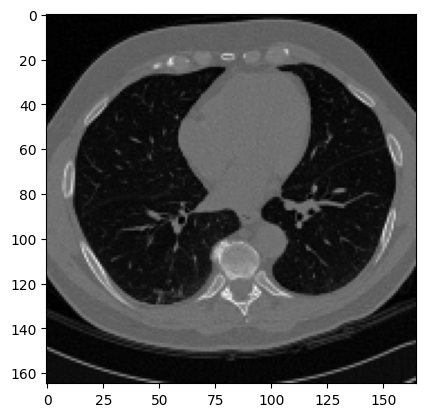

In [74]:
plot_one_slice(data_ct[100])

In [88]:
data_ct[0:165:8, :, :].shape

(21, 165, 165)

In [105]:
dataset[0][0][0].shape

torch.Size([1, 21, 64, 64])

In [106]:
#data_ct_filtered = data_ct[0:165:8, :, :]
#img = data_ct[0]

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D

def plot_3D_slices(array_3d):
    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')


    # Create a meshgrid for X and Y
    x, y = np.meshgrid(np.arange(array_3d.shape[2]), np.arange(array_3d.shape[1]))
    num_slices = array_3d.shape[0]

    # Define Z-Location
    z_locations = [i for i in np.arange(num_slices,0, -1)]  # Adjust this value to the desired z-location

    for z_location, img in zip(z_locations, array_3d):
        # Plot the image as a surface plot using imshow
        ax.plot_surface(z_location * np.ones_like(x), x, y, facecolors=plt.cm.gray(img), rstride=1, cstride=1, shade=False) 

    # Plot the image as a surface plot using imshow
    #ax.plot_surface(z_location * np.ones_like(x), x, y, facecolors=plt.cm.gray(img), rstride=1, cstride=1, shade=False)

    # Set Axis Labels
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.set_axis_off()

    #ax.view_init(elev=90, azim=-20)

    # Display the plot
    plt.show()

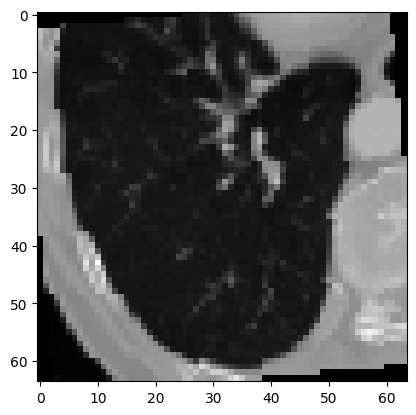

In [122]:
plot_one_slice(dataset[0][0][0].squeeze()[0])

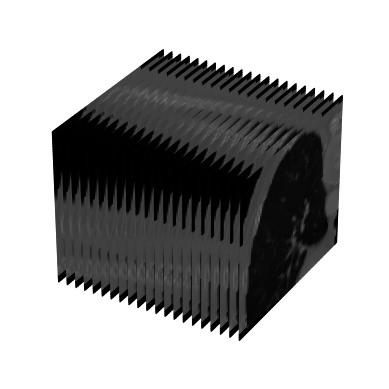

In [109]:
plot_3D_slices(dataset[0][0][0].squeeze().numpy())

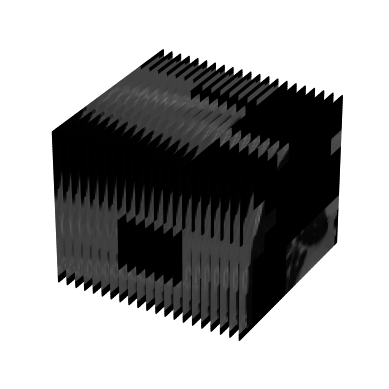

In [116]:
plot_3D_slices(dataset[0][1][0].squeeze().numpy())

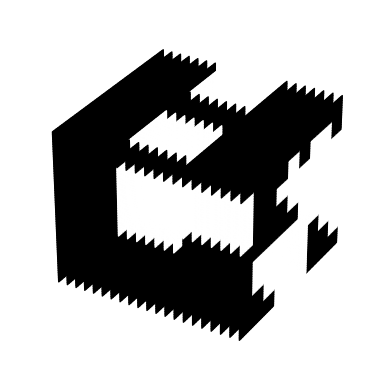

In [115]:
plot_3D_slices(dataset[0][2][0].squeeze().numpy())

---

In [15]:
import numpy as np
import os
import shutil

# Directory containing the .npz files
directory = "../cohort_test/dataset_test_2/npz/"

# List all .npz files in the directory
npz_files = [file for file in os.listdir(directory) if file.endswith(".npz")]

#all_data = [] # List to store the arrays
num_slices = []
shapes = []
# Loop through each .npz file and read the array
for npz_file in npz_files:
    npz_path = os.path.join(directory, npz_file)
    
    # Load the .npz file
    array_mri = np.load(npz_path)
    
    # Assuming each .npz file contains a single array
    array_name = array_mri.files[0]
    data_mri = array_mri[array_name].astype(float)
    
    # Append to the list of arrays
    #all_data.append(data_mri)
    num_slices.append(data_mri.shape[0])
    shapes.append(data_mri.shape)
    if data_mri.shape[0] >= 21:
        destination_path = os.path.join("../cohort_test/dataset_test_2/npz_new/", npz_file)
        # Copy the file to the new directory
        shutil.copy(npz_path, destination_path)

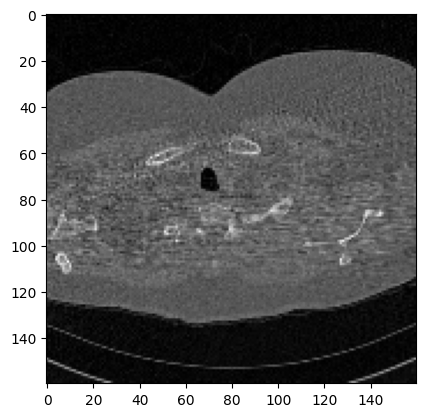

In [21]:
plot_one_slice(data_mri[10])

In [11]:
len(num_slices)

537

In [12]:
sum(i > 21 for i in num_slices)

424

In [13]:
sum(len(i)==3 for i in shapes)

537